In [155]:
print("Hello World!")

Hello World!


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
%matplotlib inline

In [157]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")
path+="/Customers.csv"
print("Path to dataset files:", path)

Path to dataset files: /home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


In [158]:
print(path)
data=pd.read_csv(path,index_col='CustomerID')
data

/home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [159]:
def gradient_calc(W,X,b,Y):
    w_gradient_sum=0
    b_gradient_sum=0
    for i in range(X.shape[0]):
        w_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])*X[i]
        b_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])
    return w_gradient_sum/len(X),b_gradient_sum/len(X)

In [160]:
def calculate_cost(W,X,b,Y):
    cost=0

    for i in range(X.shape[0]):
        cost+=((np.dot(W,X[i])+b)-Y[i])**2
    return cost/len(X)*2    

In [161]:
def gradient_descent_calc(W,X,b,Y,alpha,error_margin,iterations):
    
    if len(W)==0:
        weights = np.random.rand(X.shape[1])  # Initialize weights with the number of features
    else:
        weights = W

    if len(b) ==0:  
        biases = np.random.rand(1)[0]  
    else:
        biases = b
    print(f"Initial W: {weights} Initial B: {biases}")   
    cost_history=[]
    m,n=X.shape
    iter_count=0
    while iter_count!=iterations:
        cost_value=calculate_cost(weights,X,biases,Y)
        cost_history.append(cost_value)
        if cost_value<=error_margin:
            print("Error margin reached")
            break
        new_w,new_b=gradient_calc(weights,X,biases,Y)
        weights=weights - alpha * new_w
        biases=biases - alpha * new_b
        iter_count+=1
            
    
    return weights,biases,cost_history

    

In [162]:
# X_train = np.array([[1], [2], [3], [4]])  # 4 training samples
# Y_train = np.array([2, 3, 5, 7])

# X_train = np.array([[1, 2],
#                     [2, 3],
#                     [3, 4],
#                     [4, 5],
#                     [5, 6]])

# # Corresponding target values
# Y_train = np.array([3, 5, 7, 9, 11])

X_train = np.array([[1**2],  # 1, 1, 1
                    [2**2],  # 4, 8, 16
                    [3**2],  # 9, 27, 81
                    [4**2],  # 16, 64, 256
                    [5**2]]) # 25, 125, 625

# Corresponding target values
Y_train = np.array([2, 3, 4, 5, 6])  # You can set any desired pattern

predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,0.00002,0.01,2000)
predicted_x=np.dot(predicted_w,[25**2])+predicted_b
print(f"predicted x is {predicted_x} ")
print(f"line eqn: {predicted_w}x+{predicted_b})")
print(f"final cost is {cost_history[-1]}, predicted w :{predicted_w} and predicted b :{predicted_b}")
for i in cost_history:
    print(f"{i}\n")

Initial W: [0.71101906] Initial B: 0.4648620780998386
predicted x is 163.06149452741596 
line eqn: [0.26015165]x+0.4667158586247741)
final cost is 2.539653971964788, predicted w :[0.26015165] and predicted b :0.4667158586247741
82.24190172030023

81.61747148669485

80.99793732606553

80.38326084666798

79.77340395780044

79.16832886744312

78.56799807991612

77.97237439355577

77.38142089840898

76.79510097394619

76.21337828679144

75.63621678847107

75.06358071317962

74.49543457556317

73.9317431685205

73.37247156102093

72.81758509593982

72.26704938791055

71.72083032119369

71.17889404756285

70.64120698420682

70.10773581164858

69.57844747168015

69.05330916531413

68.53228835075097

68.01535274136221

67.50247030368969

66.99360925546047

66.48873806361675

65.98782544236232

65.49084035122324

64.99775199312428

64.50852981248049

64.02314349330342

63.54156295732256

63.06375836212108

62.58970009928652

62.11935879257603

61.652705296095654

61.18971069249417

60.730346291


2.554520586094827

2.5544818273999215

2.5544430859767018

2.554404361694102

2.5543656544220847

2.5543269640316284

2.554288290394725

2.554249633384372

2.5542109928745598

2.5541723687402693

2.5541337608574617

2.554095169103065

2.5540565933549813

2.554018033492063

2.553979489394116

2.5539409609418877

2.5539024480170593

2.5538639505022402

2.553825468280963

2.55378700123767

2.55374854925771

2.5537101122273342

2.5536716900336804

2.5536332825647743

2.55359488970952

2.5535565113576935

2.5535181473999304

2.5534797977277277

2.5534414622334336

2.5534031408102384

2.553364833352169

2.5533265397540874

2.5532882599116755

2.5532499937214355

2.553211741080681

2.553173501887529

2.553135276040897

2.553097063440495

2.553058863986818

2.553020677581143

2.552982504125521

2.552944343522769

2.5529061956764676

2.5528680604909533

2.55282993787131

2.5527918277233708

2.5527537299537038

2.55271564446961

2.5526775711791183

2.552639509990977

2.5526014608146506

2.55256

In [163]:
print(type(np.random.rand(2)))
X_train.shape

<class 'numpy.ndarray'>


(5, 1)

In [164]:
def sigmoid(f_x):
    return 1/(1+np.exp(-(f_x)))

In [165]:
def logistic_cf(W,X,y,b):
    cost=0
    m,n=X.shape
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        cost+= y[i] * (np.log(g_x)) + (1-y[i]) * (np.log(1-(g_x)))
    cost=(-1/m)*cost
    return cost

In [166]:
def logistic_gradient(W,X,y,b):
    m=X.shape[0]
    gradient_w=0
    gradient_b=0
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        gradient_w+=(g_x-y[i])*X[i]
        gradient_b+=(g_x-y[i])
    return (1/m)*gradient_w,(1/m)*gradient_b

In [167]:
def logistic_gradient_descent(W,X,y,b,iterations,alpha,error_margin):
    m,n=X.shape
    
    if len(W)==0:
        W=np.random.rand(n)   
    
    if len(b)==0:
        b=np.random.rand(1)[0]
    cost_history=[]
        
    iter_count=0
    while iter_count<iterations:
        current_cost=logistic_cf(W,X,y,b)
        cost_history.append(current_cost)
        if current_cost>error_margin:
            grad_w,grad_b=logistic_gradient(W,X,y,b)
            W=W-alpha*grad_w
            b=b-alpha*grad_b
            iter_count+=1
        else:
            break
    return W,b,cost_history        

In [168]:
# X = np.array([
#     [2, 3],    # Sample 1: Will fail (0)
#     [3, 4],    # Sample 2: Will fail (0) 
#     [4, 5],    # Sample 3: Will fail (0)
#     [5, 3],    # Sample 4: Will pass (1)
#     [6, 4],    # Sample 5: Will pass (1)
#     [7, 5],    # Sample 6: Will pass (1)
#     [3, 6],    # Sample 7: Will fail (0)
#     [4, 7],    # Sample 8: Will pass (1)
#     [5, 6],    # Sample 9: Will pass (1)
#     [6, 3]     # Sample 10: Will pass (1)
# ])

# # Labels y
# y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

#############################################################################################
# X_below_boundary = np.column_stack((np.random.uniform(0, 4, 20), np.random.uniform(0, 20, 20)))
# X_above_boundary = np.column_stack((np.random.uniform(4, 8, 20), np.random.uniform(0, 20, 20)))

# # Combine data and labels
# X = np.vstack((X_below_boundary, X_above_boundary))
# y = np.array([0] * 20 + [1] * 20)

# # Shuffle data to ensure it's not ordered
# shuffled_indices = np.random.permutation(len(X))
# X, y = X[shuffled_indices], y[shuffled_indices]
#############################################################################################



X = np.array([[2, 1], [3, 2], [4, 1], [5, 3], [6, 2], [7, 1], 
              [2, 4], [3, 5], [4, 4], [5, 6], [6, 5], [7, 4]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 


W,b,cost_history=logistic_gradient_descent([],X,y,[],10000,0.1,0.0001)
for i,j in enumerate(cost_history):
    print(f' Cost : {j} iteration {i+1}')

 Cost : 1.7605110753736817 iteration 1
 Cost : 1.5830849887879705 iteration 2
 Cost : 1.4079401020066946 iteration 3
 Cost : 1.2367007547394961 iteration 4
 Cost : 1.0722974181126774 iteration 5
 Cost : 0.9199045770534876 iteration 6
 Cost : 0.7878510957822022 iteration 7
 Cost : 0.6866335701796001 iteration 8
 Cost : 0.6230085850467451 iteration 9
 Cost : 0.592290857334494 iteration 10
 Cost : 0.580872578784589 iteration 11
 Cost : 0.5771287532503149 iteration 12
 Cost : 0.5756407581104839 iteration 13
 Cost : 0.5747014901827656 iteration 14
 Cost : 0.5738841749256637 iteration 15
 Cost : 0.5730943032372657 iteration 16
 Cost : 0.5723121258962183 iteration 17
 Cost : 0.5715336147379592 iteration 18
 Cost : 0.5707579478333855 iteration 19
 Cost : 0.5699849488964491 iteration 20
 Cost : 0.5692145713987149 iteration 21
 Cost : 0.5684467952496478 iteration 22
 Cost : 0.567681606107637 iteration 23
 Cost : 0.5669189912033099 iteration 24
 Cost : 0.5661589384666502 iteration 25
 Cost : 0.56

 Cost : 0.3173934354091693 iteration 1555
 Cost : 0.31737132648102295 iteration 1556
 Cost : 0.31734924847219986 iteration 1557
 Cost : 0.3173272013263455 iteration 1558
 Cost : 0.3173051849872351 iteration 1559
 Cost : 0.31728319939877336 iteration 1560
 Cost : 0.3172612445049945 iteration 1561
 Cost : 0.3172393202500617 iteration 1562
 Cost : 0.31721742657826657 iteration 1563
 Cost : 0.31719556343402916 iteration 1564
 Cost : 0.3171737307618967 iteration 1565
 Cost : 0.3171519285065447 iteration 1566
 Cost : 0.3171301566127753 iteration 1567
 Cost : 0.3171084150255177 iteration 1568
 Cost : 0.317086703689827 iteration 1569
 Cost : 0.31706502255088503 iteration 1570
 Cost : 0.31704337155399875 iteration 1571
 Cost : 0.3170217506446009 iteration 1572
 Cost : 0.31700015976824897 iteration 1573
 Cost : 0.3169785988706252 iteration 1574
 Cost : 0.3169570678975361 iteration 1575
 Cost : 0.31693556679491225 iteration 1576
 Cost : 0.31691409550880734 iteration 1577
 Cost : 0.316892653985399

 Cost : 0.30166441610038514 iteration 3172
 Cost : 0.30166065823959026 iteration 3173
 Cost : 0.30165690376624893 iteration 3174
 Cost : 0.3016531526767254 iteration 3175
 Cost : 0.30164940496738823 iteration 3176
 Cost : 0.30164566063461073 iteration 3177
 Cost : 0.3016419196747716 iteration 3178
 Cost : 0.30163818208425336 iteration 3179
 Cost : 0.3016344478594437 iteration 3180
 Cost : 0.30163071699673477 iteration 3181
 Cost : 0.3016269894925232 iteration 3182
 Cost : 0.3016232653432107 iteration 3183
 Cost : 0.3016195445452035 iteration 3184
 Cost : 0.30161582709491225 iteration 3185
 Cost : 0.30161211298875223 iteration 3186
 Cost : 0.30160840222314356 iteration 3187
 Cost : 0.3016046947945109 iteration 3188
 Cost : 0.3016009906992834 iteration 3189
 Cost : 0.3015972899338947 iteration 3190
 Cost : 0.3015935924947837 iteration 3191
 Cost : 0.301589898378393 iteration 3192
 Cost : 0.30158620758117016 iteration 3193
 Cost : 0.3015825200995675 iteration 3194
 Cost : 0.30157883593004

 Cost : 0.2982958375651734 iteration 4837
 Cost : 0.2982948556786661 iteration 4838
 Cost : 0.29829387451344946 iteration 4839
 Cost : 0.2982928940689318 iteration 4840
 Cost : 0.29829191434452135 iteration 4841
 Cost : 0.29829093533962675 iteration 4842
 Cost : 0.2982899570536578 iteration 4843
 Cost : 0.29828897948602406 iteration 4844
 Cost : 0.29828800263613675 iteration 4845
 Cost : 0.29828702650340644 iteration 4846
 Cost : 0.29828605108724526 iteration 4847
 Cost : 0.29828507638706514 iteration 4848
 Cost : 0.2982841024022789 iteration 4849
 Cost : 0.2982831291322997 iteration 4850
 Cost : 0.298282156576542 iteration 4851
 Cost : 0.2982811847344198 iteration 4852
 Cost : 0.29828021360534784 iteration 4853
 Cost : 0.2982792431887422 iteration 4854
 Cost : 0.2982782734840187 iteration 4855
 Cost : 0.2982773044905938 iteration 4856
 Cost : 0.298276336207885 iteration 4857
 Cost : 0.29827536863530973 iteration 4858
 Cost : 0.29827440177228637 iteration 4859
 Cost : 0.298273435618233

 Cost : 0.29732581417657383 iteration 6533
 Cost : 0.29732551062172563 iteration 6534
 Cost : 0.2973252072666617 iteration 6535
 Cost : 0.2973249041112409 iteration 6536
 Cost : 0.29732460115532233 iteration 6537
 Cost : 0.2973242983987655 iteration 6538
 Cost : 0.2973239958414293 iteration 6539
 Cost : 0.29732369348317345 iteration 6540
 Cost : 0.2973233913238574 iteration 6541
 Cost : 0.29732308936334084 iteration 6542
 Cost : 0.29732278760148356 iteration 6543
 Cost : 0.2973224860381452 iteration 6544
 Cost : 0.29732218467318605 iteration 6545
 Cost : 0.29732188350646593 iteration 6546
 Cost : 0.29732158253784524 iteration 6547
 Cost : 0.29732128176718403 iteration 6548
 Cost : 0.29732098119434297 iteration 6549
 Cost : 0.2973206808191823 iteration 6550
 Cost : 0.2973203806415629 iteration 6551
 Cost : 0.2973200806613454 iteration 6552
 Cost : 0.2973197808783907 iteration 6553
 Cost : 0.2973194812925595 iteration 6554
 Cost : 0.29731918190371304 iteration 6555
 Cost : 0.297318882711

 Cost : 0.2970211497860724 iteration 8148
 Cost : 0.29702104134937046 iteration 8149
 Cost : 0.29702093297988785 iteration 8150
 Cost : 0.2970208246775803 iteration 8151
 Cost : 0.2970207164424049 iteration 8152
 Cost : 0.29702060827431775 iteration 8153
 Cost : 0.2970205001732756 iteration 8154
 Cost : 0.2970203921392347 iteration 8155
 Cost : 0.2970202841721521 iteration 8156
 Cost : 0.2970201762719838 iteration 8157
 Cost : 0.297020068438687 iteration 8158
 Cost : 0.29701996067221814 iteration 8159
 Cost : 0.29701985297253397 iteration 8160
 Cost : 0.2970197453395909 iteration 8161
 Cost : 0.2970196377733462 iteration 8162
 Cost : 0.29701953027375616 iteration 8163
 Cost : 0.29701942284077787 iteration 8164
 Cost : 0.29701931547436855 iteration 8165
 Cost : 0.29701920817448413 iteration 8166
 Cost : 0.2970191009410824 iteration 8167
 Cost : 0.2970189937741197 iteration 8168
 Cost : 0.2970188866735533 iteration 8169
 Cost : 0.2970187796393402 iteration 8170
 Cost : 0.2970186726714374

 Cost : 0.29690930299124885 iteration 9778
 Cost : 0.2969092627431005 iteration 9779
 Cost : 0.29690922251901086 iteration 9780
 Cost : 0.29690918231896524 iteration 9781
 Cost : 0.2969091421429493 iteration 9782
 Cost : 0.2969091019909479 iteration 9783
 Cost : 0.2969090618629462 iteration 9784
 Cost : 0.2969090217589296 iteration 9785
 Cost : 0.2969089816788833 iteration 9786
 Cost : 0.2969089416227928 iteration 9787
 Cost : 0.2969089015906428 iteration 9788
 Cost : 0.29690886158241914 iteration 9789
 Cost : 0.2969088215981067 iteration 9790
 Cost : 0.29690878163769135 iteration 9791
 Cost : 0.2969087417011578 iteration 9792
 Cost : 0.2969087017884915 iteration 9793
 Cost : 0.2969086618996781 iteration 9794
 Cost : 0.2969086220347024 iteration 9795
 Cost : 0.2969085821935503 iteration 9796
 Cost : 0.2969085423762069 iteration 9797
 Cost : 0.29690850258265755 iteration 9798
 Cost : 0.2969084628128875 iteration 9799
 Cost : 0.29690842306688253 iteration 9800
 Cost : 0.2969083833446276 

In [169]:
test_value=np.array([2,5])
inferred_x=np.dot(W,test_value)+b
pred=sigmoid(inferred_x)
print(W,b)
if pred>=0.5:
    print("Passes Exam")
else:
    print("Fails exam")
    
decision_boundary= [(x_1,(- (b + W[0] * x_1) / W[1])) for x_1 in range(8) ]
db_x=[i for i,j in decision_boundary]
db_y=[j for i,j in decision_boundary]
print(decision_boundary)

[0.97028409 1.56027957] -7.733357636003159
Passes Exam
[(0, 4.9563922879462705), (1, 4.334526752035328), (2, 3.7126612161243853), (3, 3.090795680213443), (4, 2.4689301443025005), (5, 1.8470646083915576), (6, 1.2251990724806154), (7, 0.6033335365696728)]


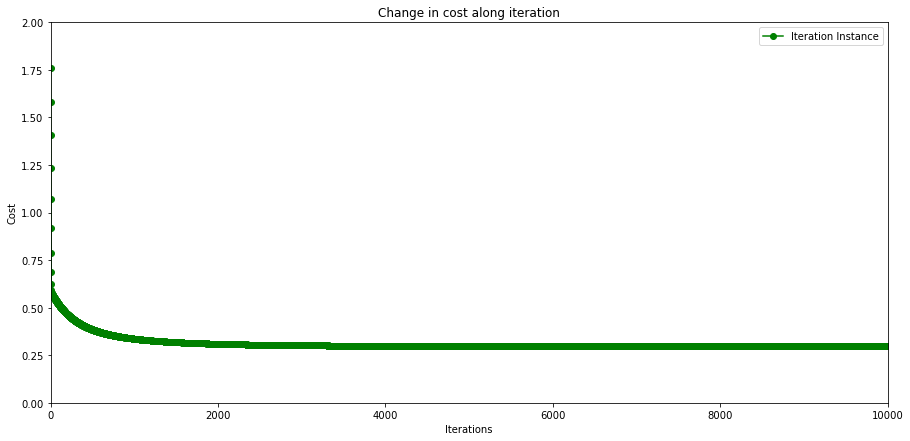

In [170]:
plt.figure(figsize=(15,7)) # must be declared first
plt.plot([i for i in range(len(cost_history))],cost_history,'go-',label='Iteration Instance')
plt.title('Change in cost along iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.xlim(0, 10000) #value limits 
plt.ylim(0, 2) #value limits

plt.show()

In [171]:
a=['a','b','c']
b=[i for i in range(len(a))]

c=[(1,2),(2,3),(4,5)]
d=[(i,i**2) for i,j in c ]
d

[(1, 1), (2, 4), (4, 16)]

(0.0, 20.0)

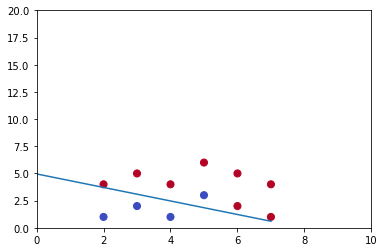

In [172]:
np
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
plt.plot(db_x,db_y)
plt.xlim(0, 10) #value limits 
plt.ylim(0, 20) #value limits


In [173]:
# help(plt.plot)

AttributeError: 'AxesSubplot' object has no attribute 'xlim'

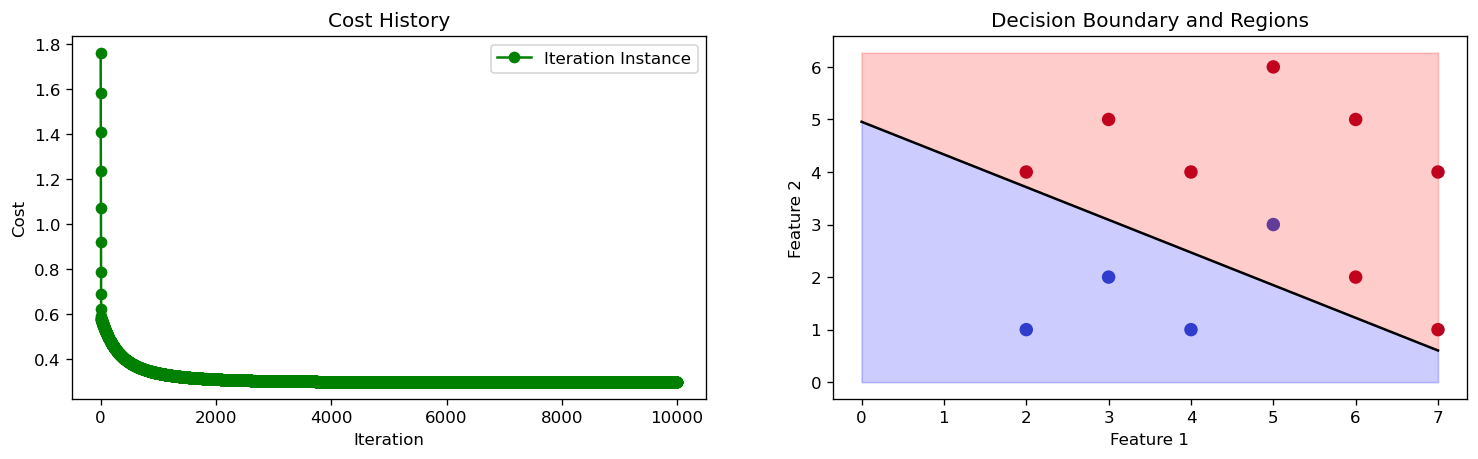

In [189]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), dpi=120)

# Plot the cost history (iterations vs cost)
ax1.plot([i for i in range(len(cost_history))], cost_history, 'go-', label='Iteration Instance')
ax1.set_title('Cost History')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.legend()

# Scatter plot of data points and decision boundary
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Data Points')

# Plot decision boundary
db_x = np.array(db_x)  # X coordinates of the decision boundary
db_y = np.array(db_y)  # Y coordinates of the decision boundary
ax2.plot(db_x, db_y, 'k-', label='Decision Boundary')

# Fill regions based on the decision boundary
# Above the boundary -> Class 1 Region
ax2.fill_between(db_x, db_y, y2=ax2.get_ylim()[1], color='red', alpha=0.2, label='Class 1 Region')
#fill from y1 to y2
# Below the boundary -> Class 2 Region
ax2.fill_between(db_x, db_y,   color='blue', alpha=0.2, label='Class 2 Region')
# Configure plot aesthetics
ax2.set_title('Decision Boundary and Regions')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
# ax1.xlim(0,5000)
# ax1.ylim(0,2)
# ax1. 
# plt.tight_layout()
plt.show()


In [175]:


# # Generate some example data
# X = np.random.randn(100, 2)
# y = (X[:, 0] + X[:, 1] > 0).astype(int)

# # Create a meshgrid to evaluate the decision boundary over the whole feature space
# xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

# # Example: Decision function (for a linear boundary, we use a simple classifier)
# Z = xx + yy  # This represents a linear decision boundary y = -x

# # Create subplots
# fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# # Scatter plot of the data
# ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)

# # Use contour to fill regions
# # Plot the decision boundary where Z = 0
# contour = ax.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], colors=['red', 'blue'], alpha=0.2)

# # Add the decision boundary line
# ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)

# # Set labels
# ax.set_xlabel('$x_0$')
# ax.set_ylabel('$x_1$')

# # Show the plot
# plt.show()


In [176]:
# X = np.array(db_x)  # X coordinates
# Y = np.array(db_y)   

# # Create a figure and axis
# plt.figure(figsize=(8, 6))

# # Fill below the line (towards y=0)
# plt.fill_between(X, Y, 0, where=(Y != Y), color='blue', alpha=0.2, label='Above y=0')
# plt.fill_between(X, Y, 0, where=(Y > Y), color='red', alpha=0.2, label='Below y=0')

# # Plot the line
# plt.plot(X, Y, color='black', label='Boundary line')

# # Add labels and legend
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Colored Fill Around a Line')
# plt.legend()
# plt.show()